1. **Data Loading and Label Association**:
   - Loads EEG feature data (DE_LDS and PSD_LDS) from a specified `.mat` file.
   - Uses a predefined `session1_label` list to associate each trial with an emotion label (0, 1, 2, 3 corresponding to neutral, sad, fear, happy).
   - Filters the loaded data keys to identify the relevant DE_LDS and PSD_LDS entries.
   - Groups and concatenates all DE_LDS and PSD_LDS data by their respective emotion labels, resulting in arrays that represent all trials for each emotion.

2. **Data Inspection**:
   - Prints the shapes of the concatenated DE_LDS and PSD_LDS arrays for each emotion label.
   - Interprets the dimensions of the data (e.g., number of channels, total time windows, frequency bands) based on the array shapes.



In [6]:
# Step 1: Load, Concatenate, and Inspect Data by Labels
import scipy.io as sio
import numpy as np

# Define the file path to the specific .mat file
file_path = 'D:/BigData/SEED_IV/SEED_IV/eeg_feature_smooth/1/1_20160518.mat'


# Load the .mat file
mat_data = sio.loadmat(file_path)

# Define session labels for emotions
session1_label = [1, 2, 3, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 3, 2, 2, 3, 3, 0, 3, 0, 3]
#The labels with 0, 1, 2, and 3 denote the ground truth, neutral, sad, fear, and happy emotions, respectively.

# Filter keys to include only relevant ones (those that match the number of session labels)
relevant_keys = [key for key in mat_data.keys() if ('de_LDS' in key or 'psd_LDS' in key) and not key.startswith('__')]

# Initialize dictionaries to store data by emotion label
de_lds_by_label = {0: [], 1: [], 2: [], 3: []}
psd_lds_by_label = {0: [], 1: [], 2: [], 3: []}

# Concatenate data based on label
for idx, key in enumerate(relevant_keys):
    if idx < len(session1_label):
        label = session1_label[idx]
        if 'de_LDS' in key:
            de_lds_by_label[label].append(mat_data[key])
        elif 'psd_LDS' in key:
            psd_lds_by_label[label].append(mat_data[key])

# Concatenate all de_LDS and psd_LDS data by emotion label
concatenated_de_lds_by_label = {label: np.concatenate(data_list, axis=1) for label, data_list in de_lds_by_label.items() if len(data_list) > 0}
concatenated_psd_lds_by_label = {label: np.concatenate(data_list, axis=1) for label, data_list in psd_lds_by_label.items() if len(data_list) > 0}

# Print the shapes of the concatenated data for each emotion label
for label in concatenated_de_lds_by_label:
    print(f'Concatenated de_LDS for Emotion {label}: Shape: {concatenated_de_lds_by_label[label].shape}')
for label in concatenated_psd_lds_by_label:
    print(f'Concatenated psd_LDS for Emotion {label}: Shape: {concatenated_psd_lds_by_label[label].shape}')

# Document shapes and variability of concatenated data by label
for label in concatenated_de_lds_by_label:
    data = concatenated_de_lds_by_label[label]
    print(f'de_LDS Emotion {label}: Channels: {data.shape[0]}, Total Time Windows: {data.shape[1]}, Frequency Bands: {data.shape[2]}')
for label in concatenated_psd_lds_by_label:
    data = concatenated_psd_lds_by_label[label]
    print(f'psd_LDS Emotion {label}: Channels: {data.shape[0]}, Total Time Windows: {data.shape[1]}, Frequency Bands: {data.shape[2]}')

Concatenated de_LDS for Emotion 0: Shape: (62, 93, 5)
Concatenated de_LDS for Emotion 1: Shape: (62, 80, 5)
Concatenated de_LDS for Emotion 2: Shape: (62, 177, 5)
Concatenated de_LDS for Emotion 3: Shape: (62, 65, 5)
Concatenated psd_LDS for Emotion 0: Shape: (62, 72, 5)
Concatenated psd_LDS for Emotion 1: Shape: (62, 132, 5)
Concatenated psd_LDS for Emotion 2: Shape: (62, 78, 5)
Concatenated psd_LDS for Emotion 3: Shape: (62, 133, 5)
de_LDS Emotion 0: Channels: 62, Total Time Windows: 93, Frequency Bands: 5
de_LDS Emotion 1: Channels: 62, Total Time Windows: 80, Frequency Bands: 5
de_LDS Emotion 2: Channels: 62, Total Time Windows: 177, Frequency Bands: 5
de_LDS Emotion 3: Channels: 62, Total Time Windows: 65, Frequency Bands: 5
psd_LDS Emotion 0: Channels: 62, Total Time Windows: 72, Frequency Bands: 5
psd_LDS Emotion 1: Channels: 62, Total Time Windows: 132, Frequency Bands: 5
psd_LDS Emotion 2: Channels: 62, Total Time Windows: 78, Frequency Bands: 5
psd_LDS Emotion 3: Channels: 62

3. **Statistical Analysis**:
   - Computes variance and standard deviation of the features across time windows for each emotion.
   - Uses boxplots to visualize the distribution of variance and standard deviation for each emotion and feature type (DE_LDS and PSD_LDS).
   - This step helps in understanding the variability and spread of the EEG features under different emotional states.

4. **Correlation Analysis**:
   - Flattens the data (combining channels and time windows) to focus on frequency bands.
   - Computes correlation matrices of frequency bands for each emotion.
   - Visualizes these correlations with heatmaps to identify how frequency bands relate to each other within an emotion category.

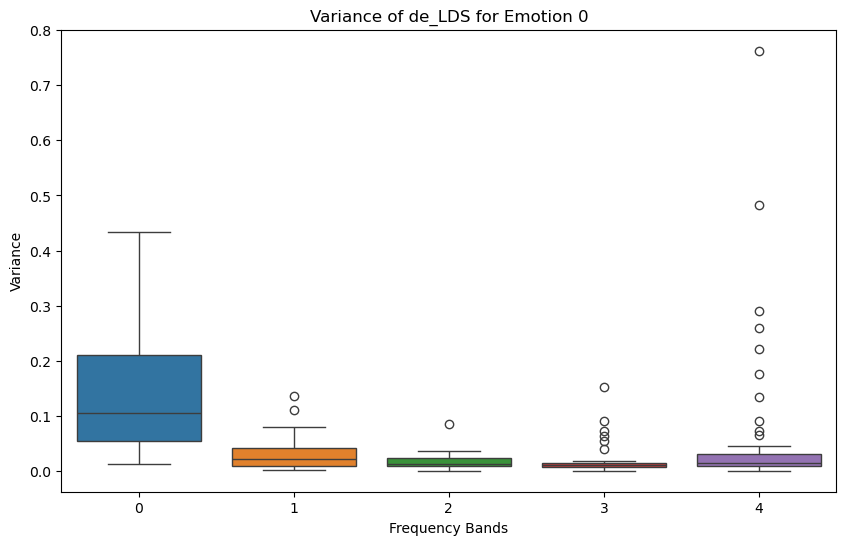

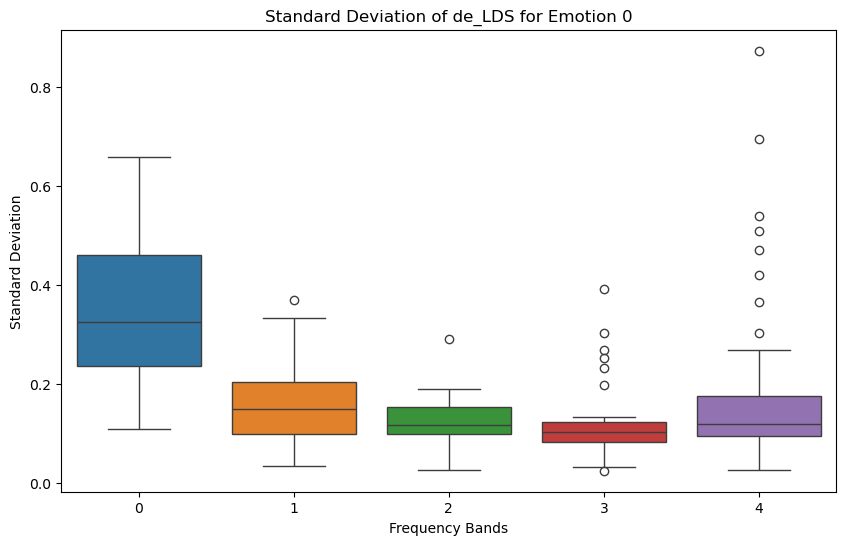

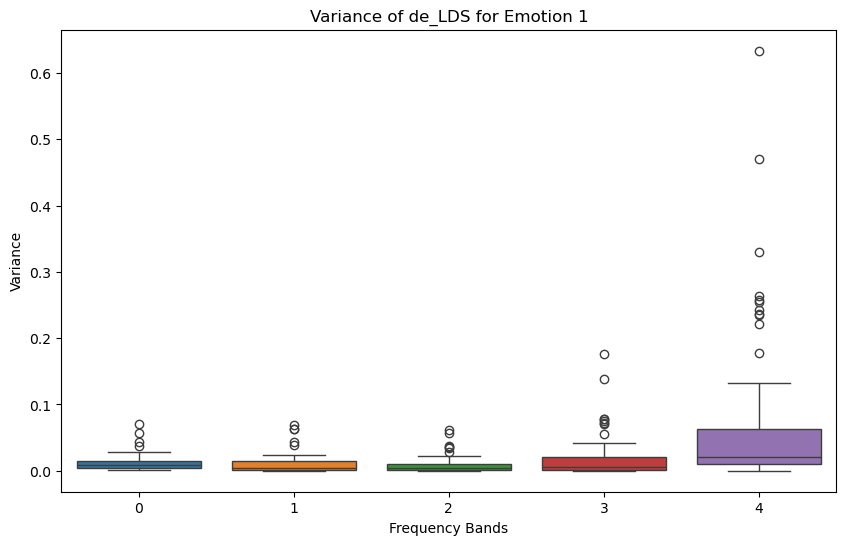

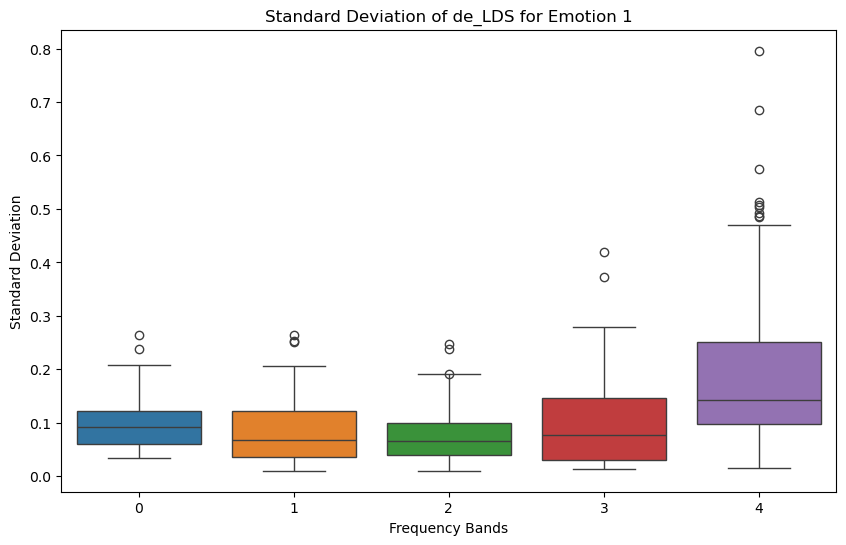

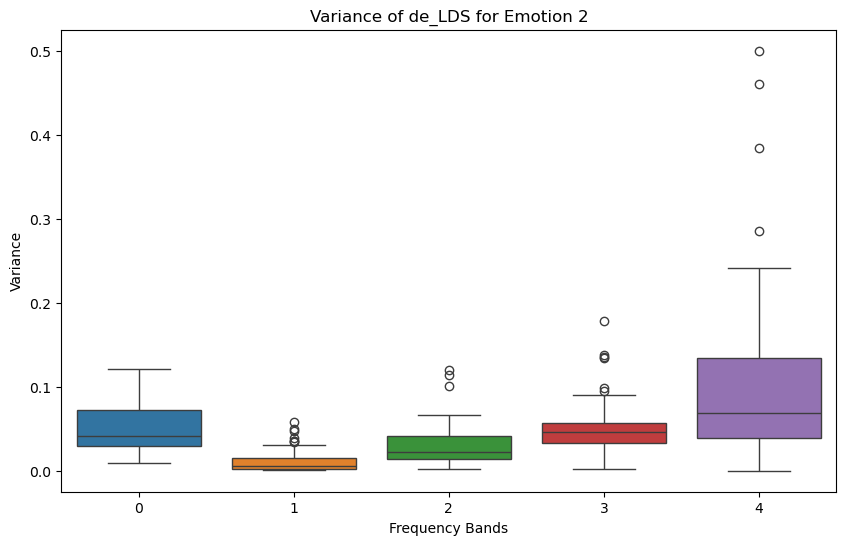

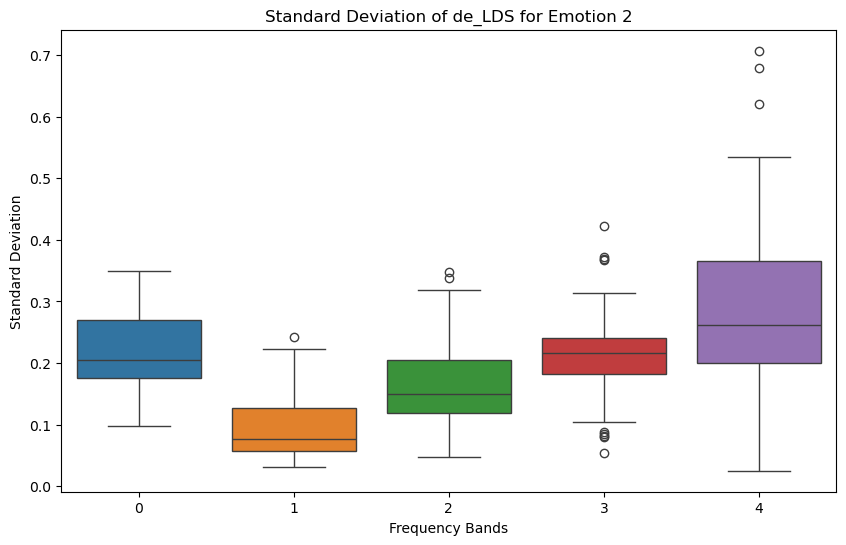

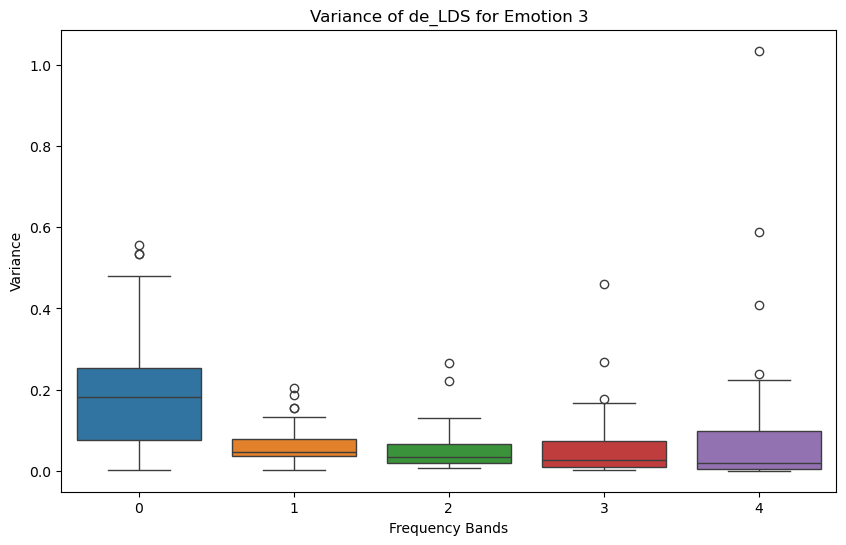

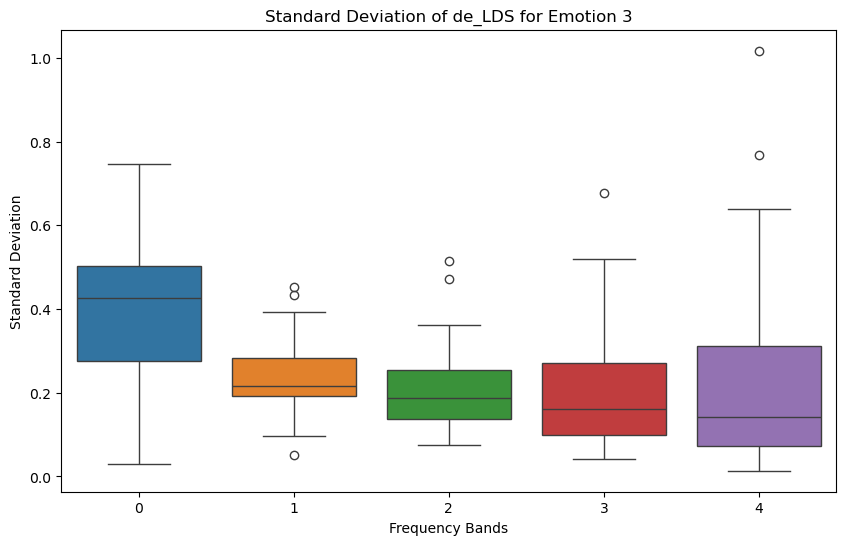

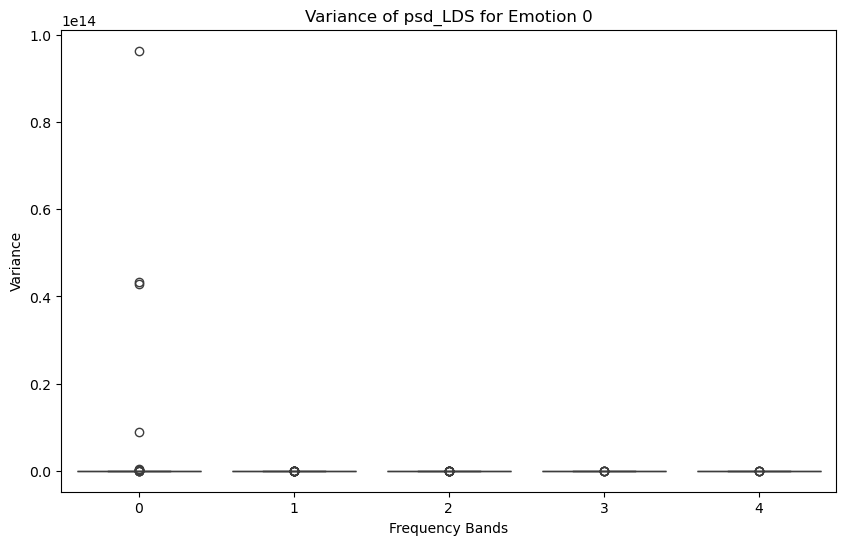

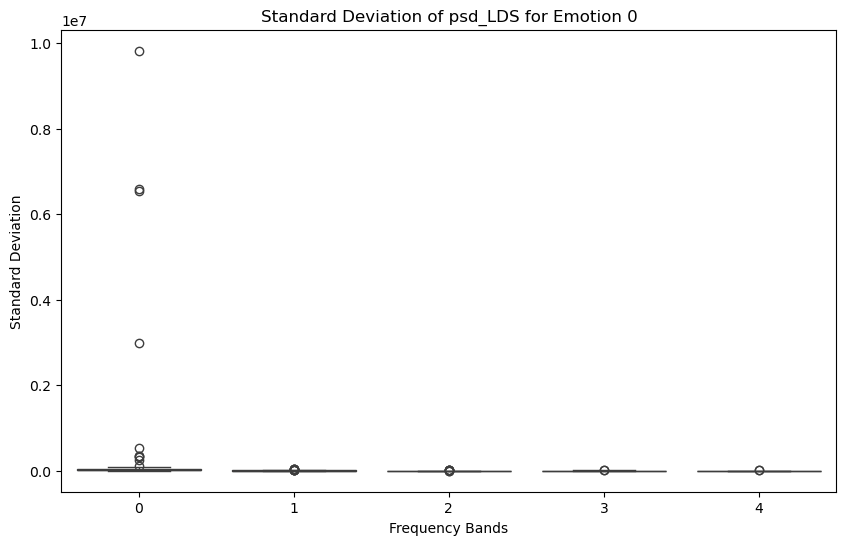

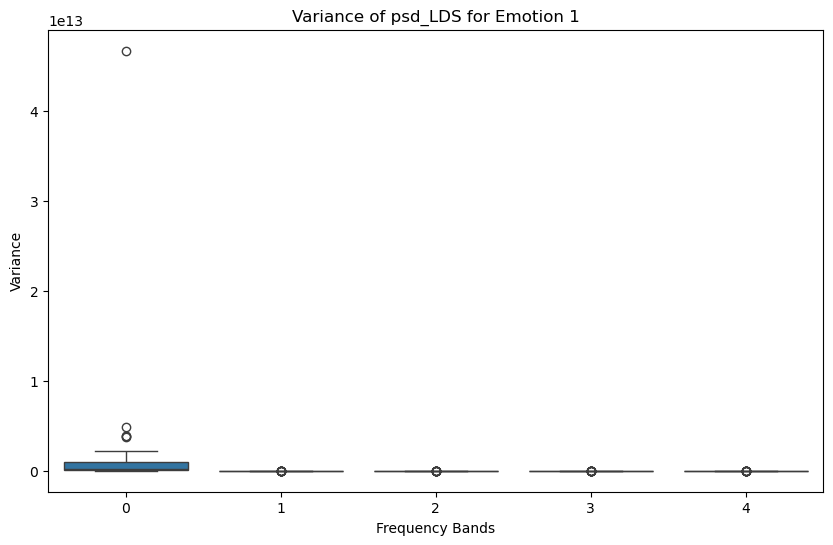

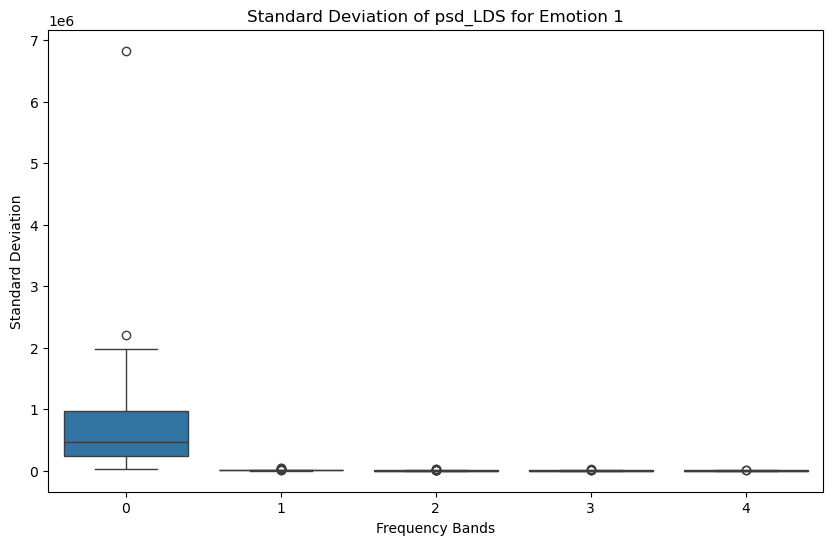

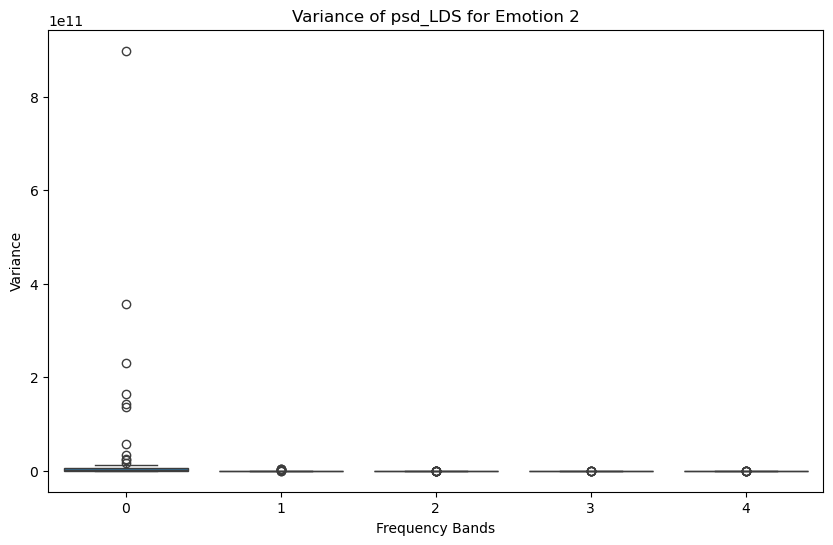

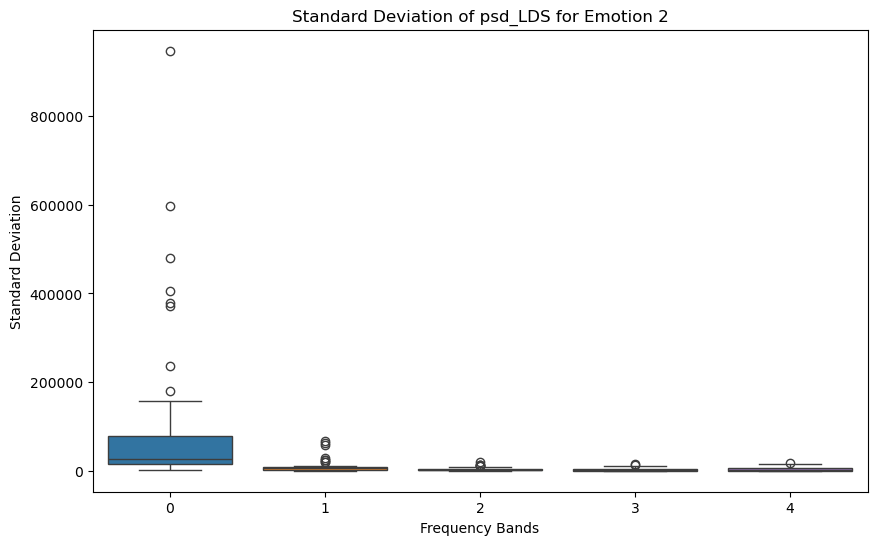

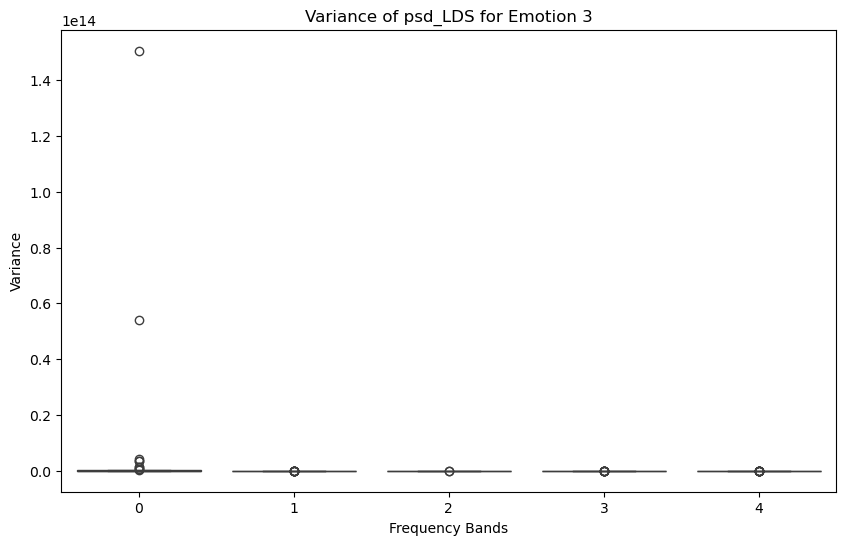

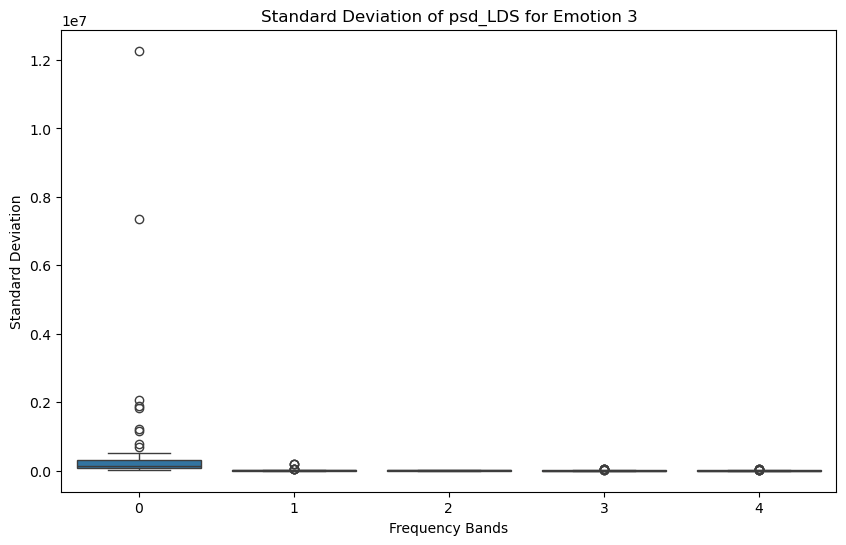

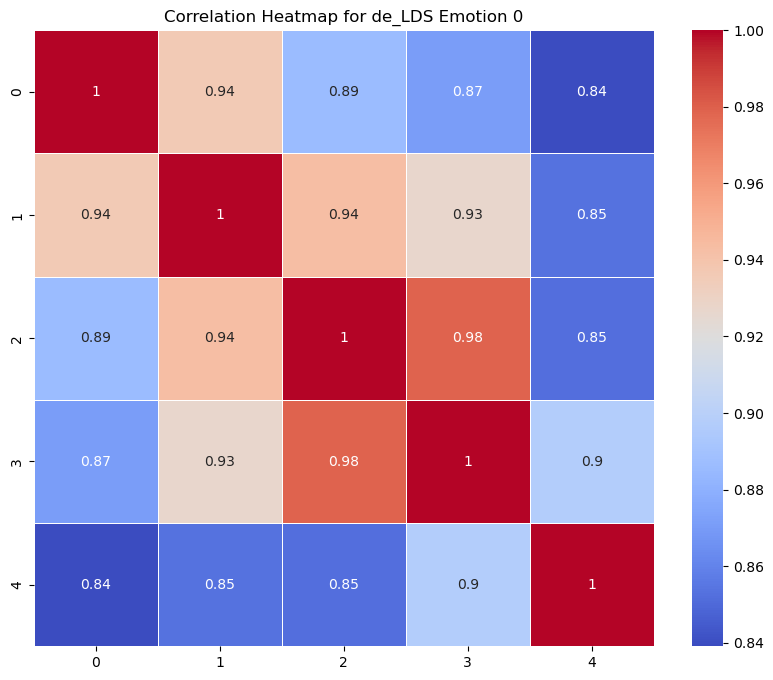

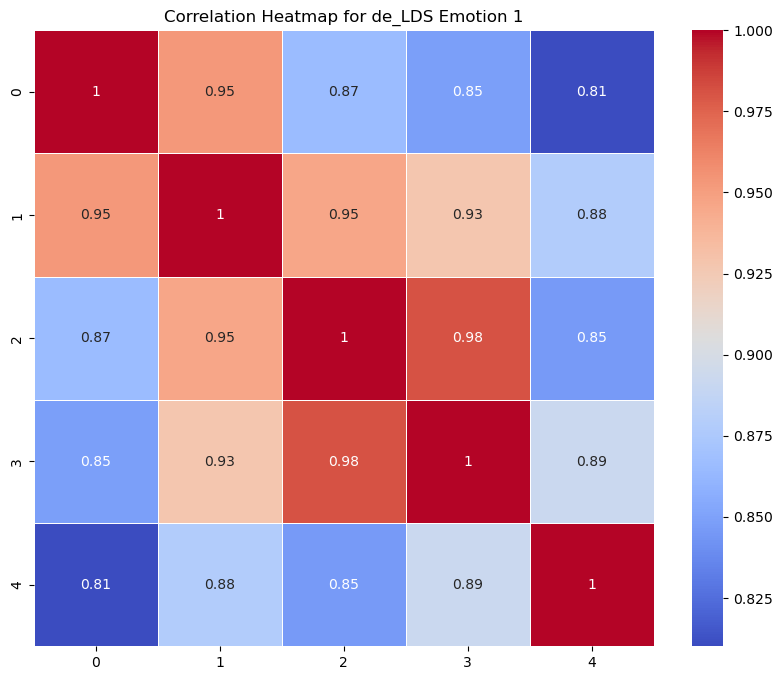

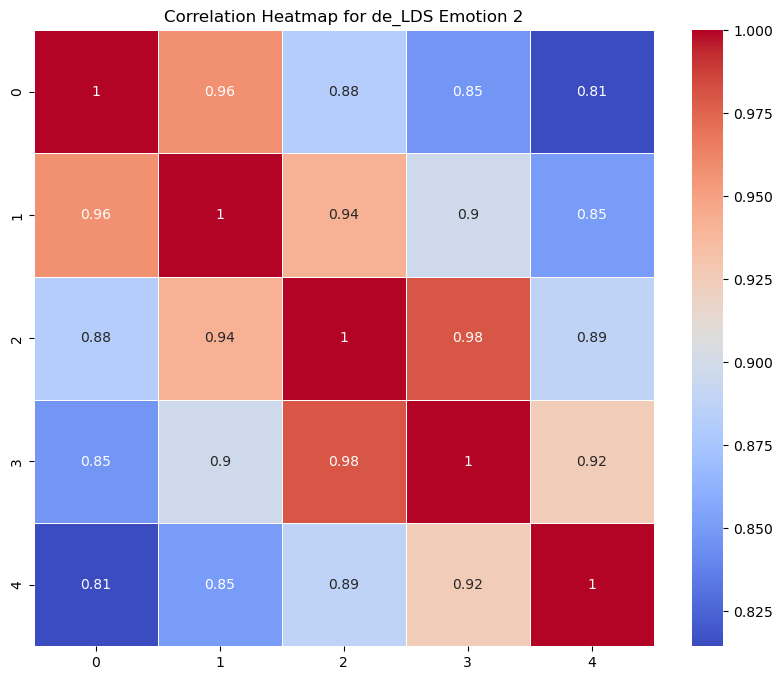

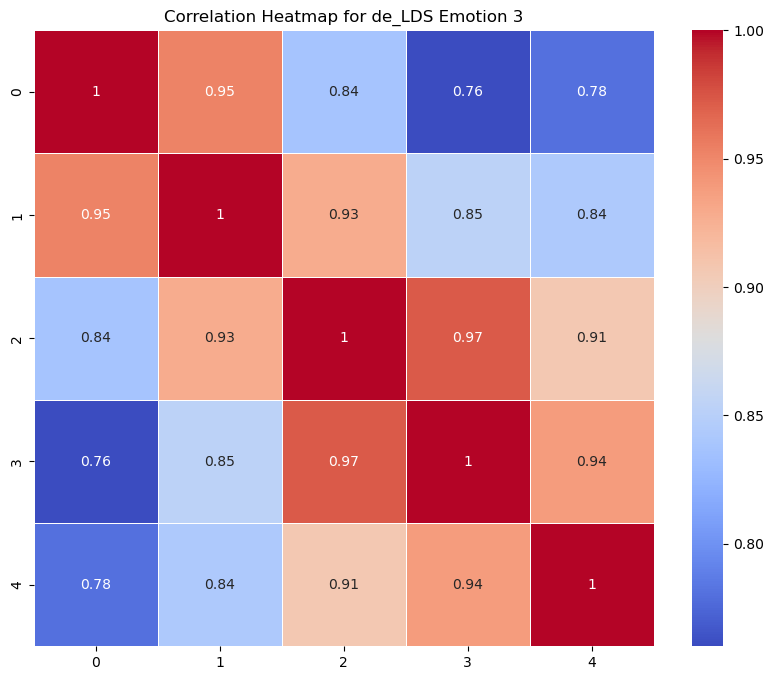

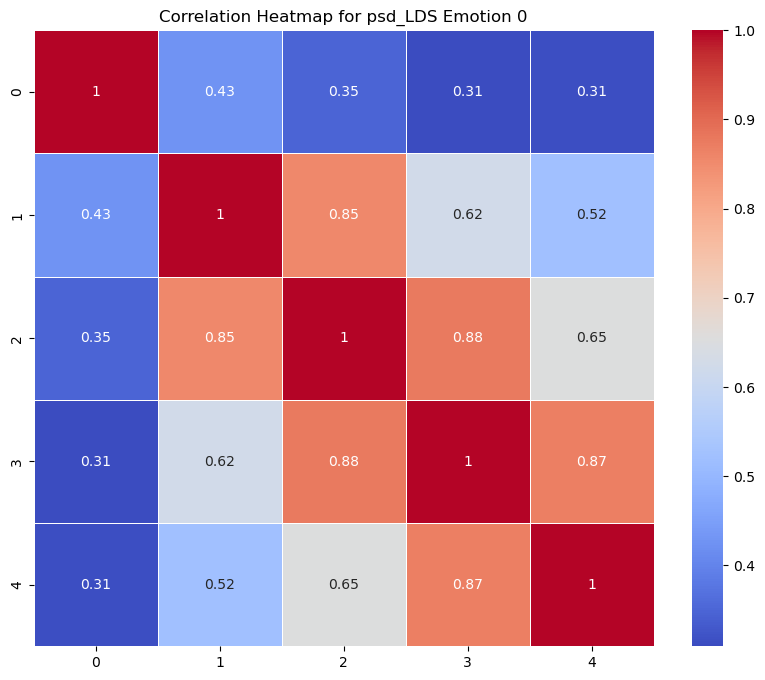

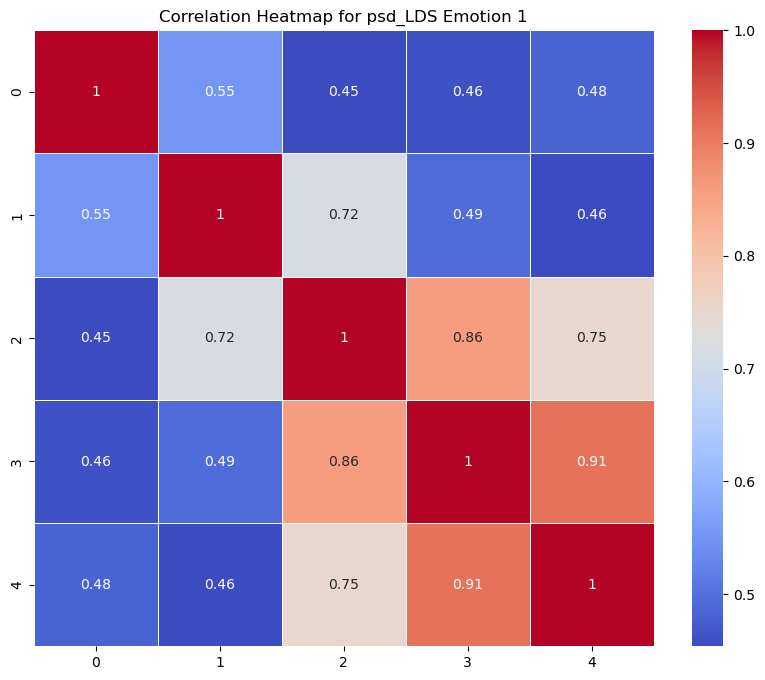

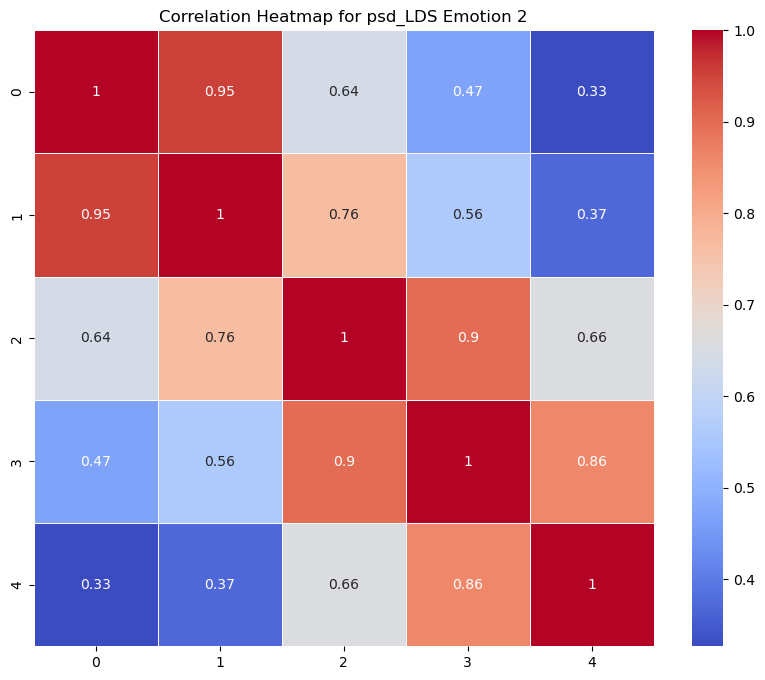

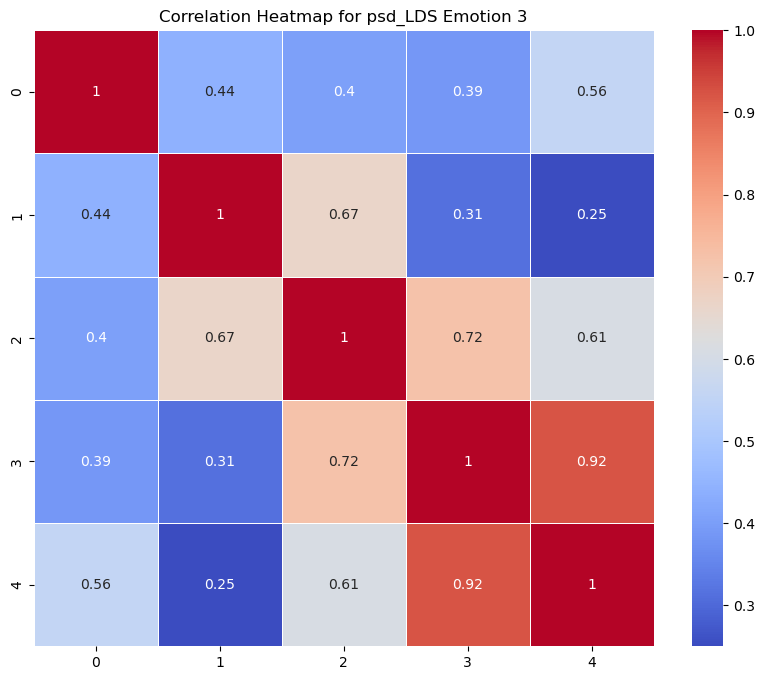

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1.1: Statistical Analysis and Visualization
# Variance and Standard Deviation Analysis for Each Emotion
for label in concatenated_de_lds_by_label:
    data = concatenated_de_lds_by_label[label]
    variance = np.var(data, axis=1)  # Variance across time windows
    std_dev = np.std(data, axis=1)  # Standard deviation across time windows

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=variance)
    plt.title(f'Variance of de_LDS for Emotion {label}')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Variance')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=std_dev)
    plt.title(f'Standard Deviation of de_LDS for Emotion {label}')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Standard Deviation')
    plt.show()

for label in concatenated_psd_lds_by_label:
    data = concatenated_psd_lds_by_label[label]
    variance = np.var(data, axis=1)  # Variance across time windows
    std_dev = np.std(data, axis=1)  # Standard deviation across time windows

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=variance)
    plt.title(f'Variance of psd_LDS for Emotion {label}')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Variance')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=std_dev)
    plt.title(f'Standard Deviation of psd_LDS for Emotion {label}')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Standard Deviation')
    plt.show()

# Step 1.2: Correlation Analysis for Each Emotion
for label in concatenated_de_lds_by_label:
    data = concatenated_de_lds_by_label[label].reshape(-1, concatenated_de_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    correlation_matrix = np.corrcoef(data, rowvar=False)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for de_LDS Emotion {label}')
    plt.show()

for label in concatenated_psd_lds_by_label:
    data = concatenated_psd_lds_by_label[label].reshape(-1, concatenated_psd_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    correlation_matrix = np.corrcoef(data, rowvar=False)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for psd_LDS Emotion {label}')
    plt.show()

5. **Dimensionality Reduction (PCA and t-SNE)**:
   - Applies Principal Component Analysis (PCA) to reduce the dimensionality of the flattened data, extracting the first two principal components.
   - Plots these components to see how data points cluster or separate by emotion in a lower-dimensional space.
   - Applies t-SNE, another dimensionality reduction method, to visualize complex patterns or clusters in 2D space.
   - These visualizations (scatter plots from PCA and t-SNE) help in exploring whether different emotional states form distinct groups or share similar feature distributions.

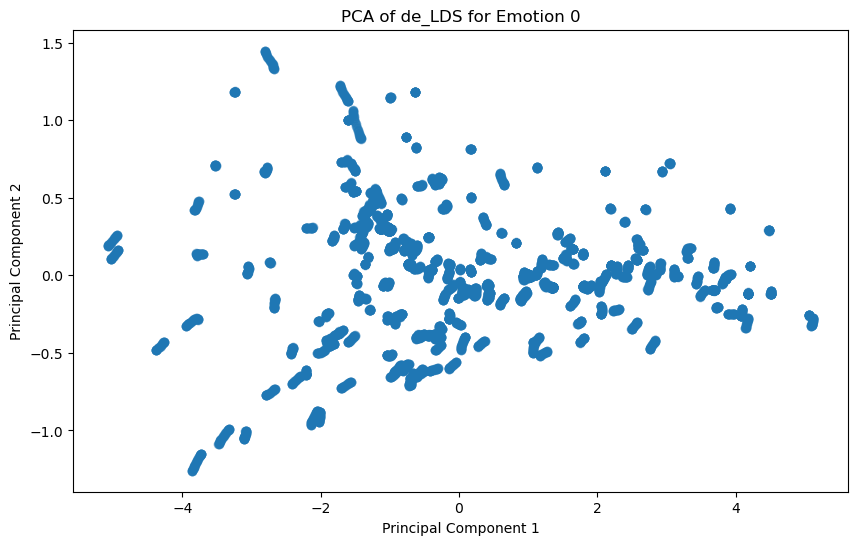

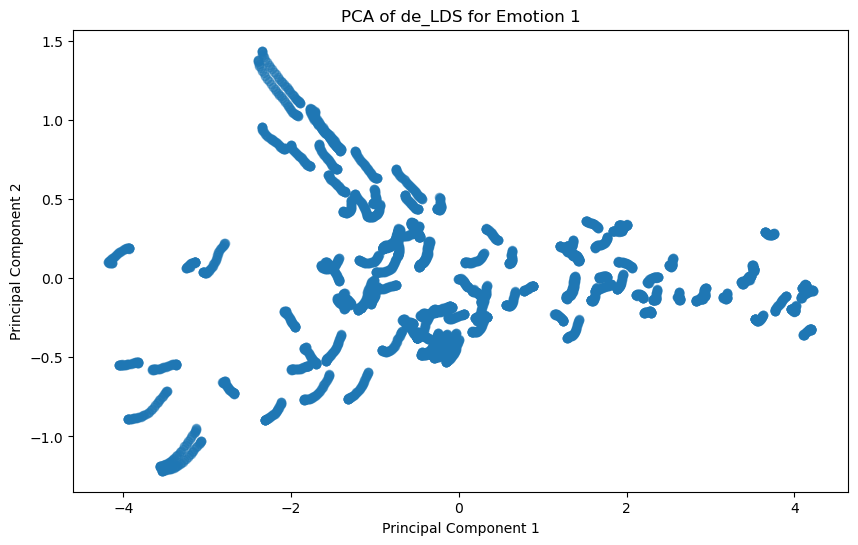

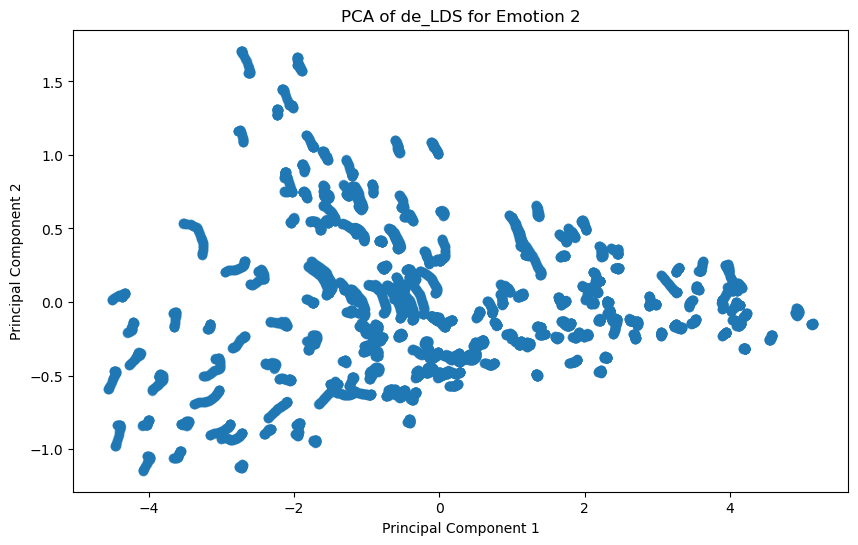

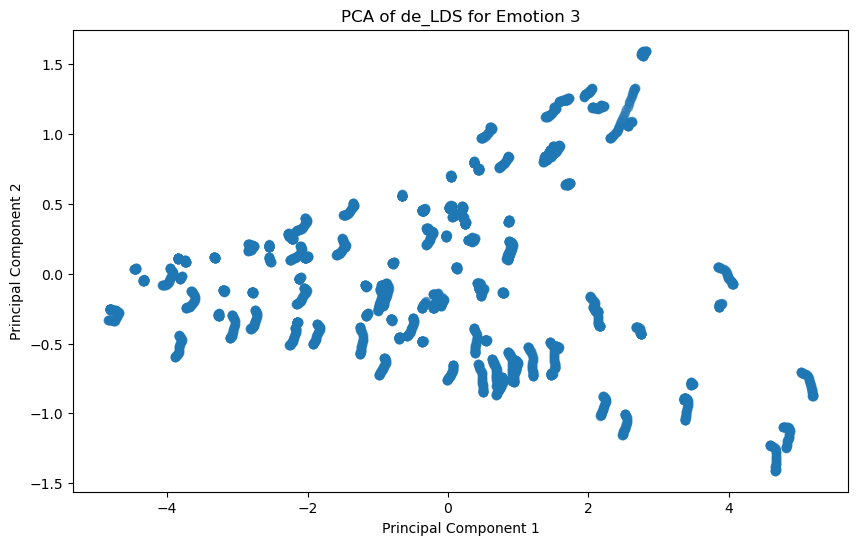

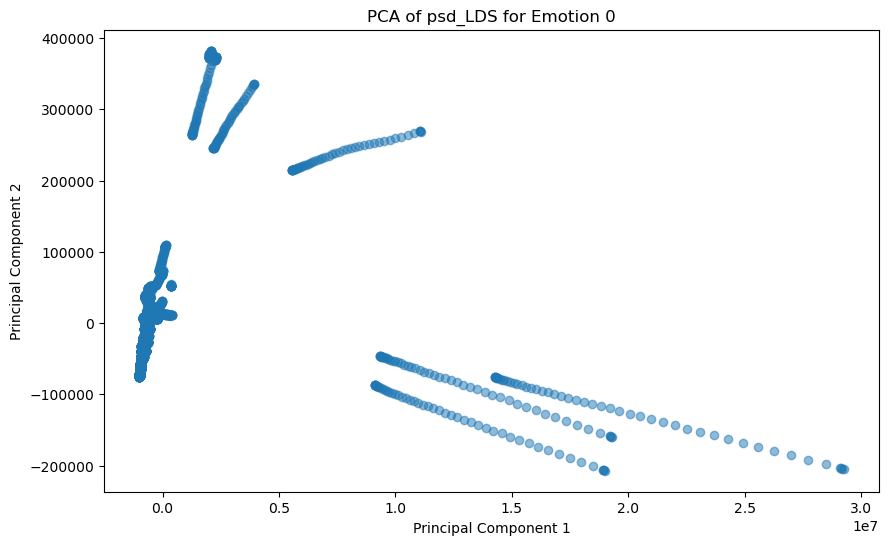

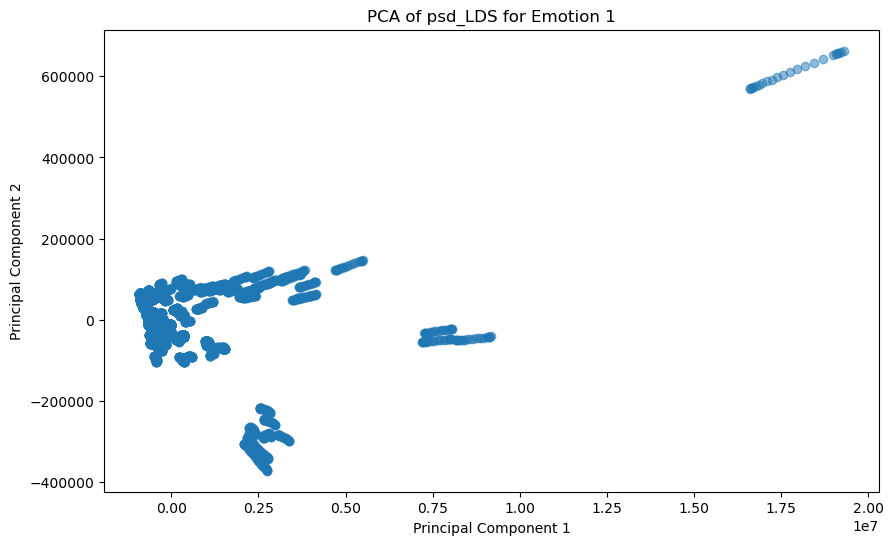

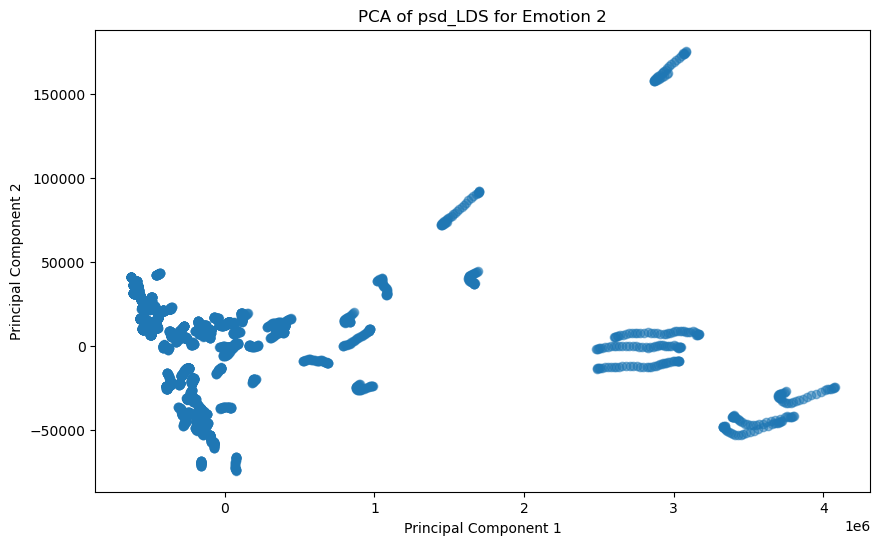

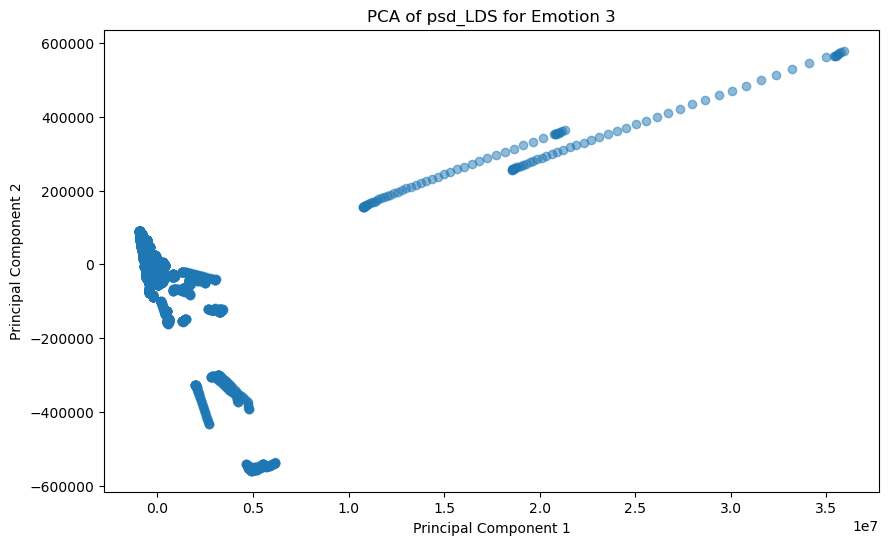

C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


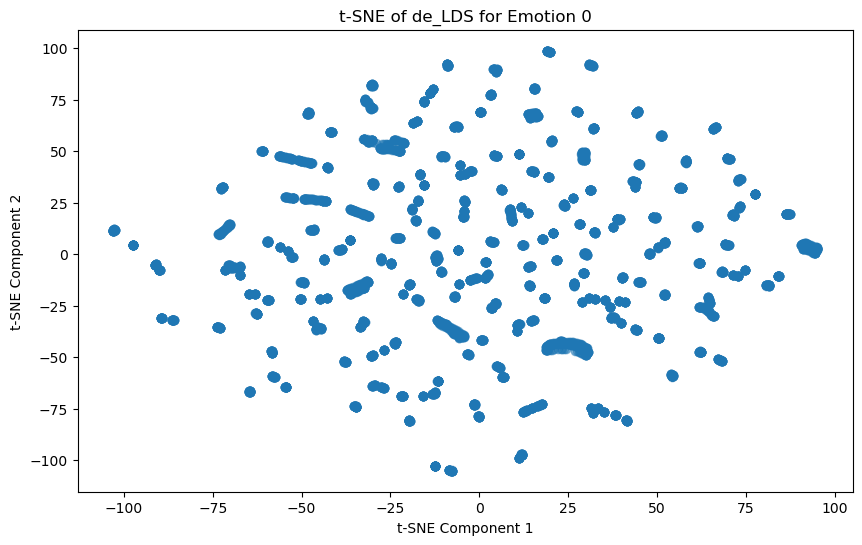

C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


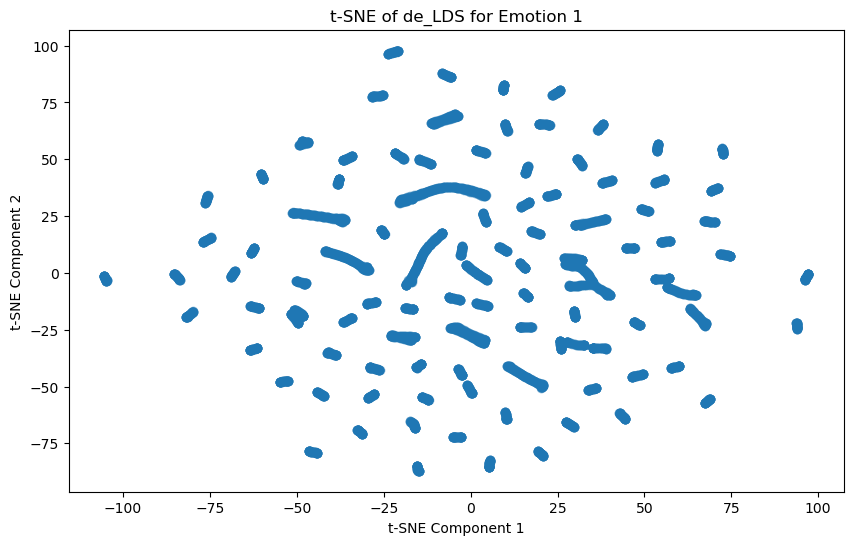

C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


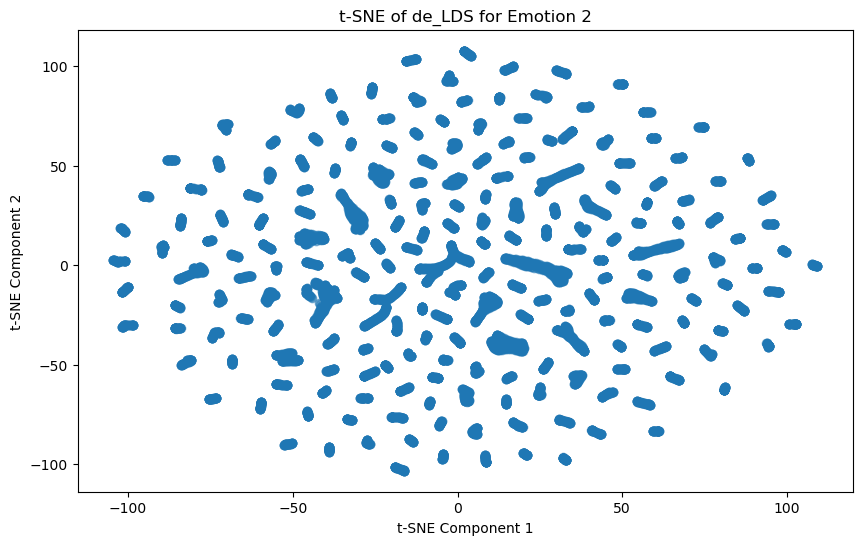

C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


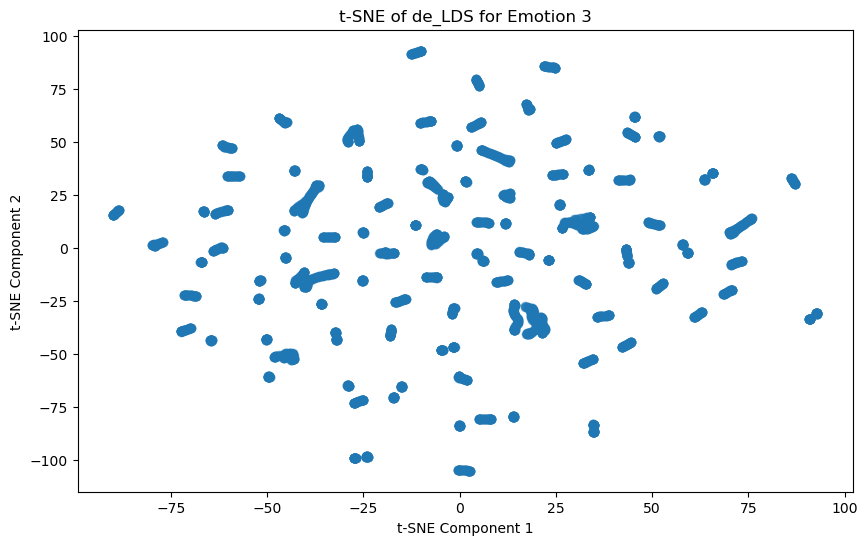

C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


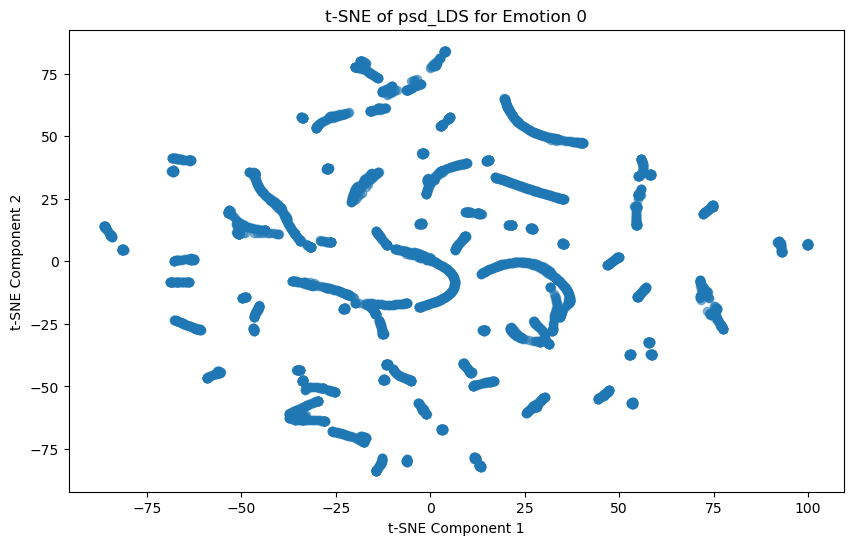

C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


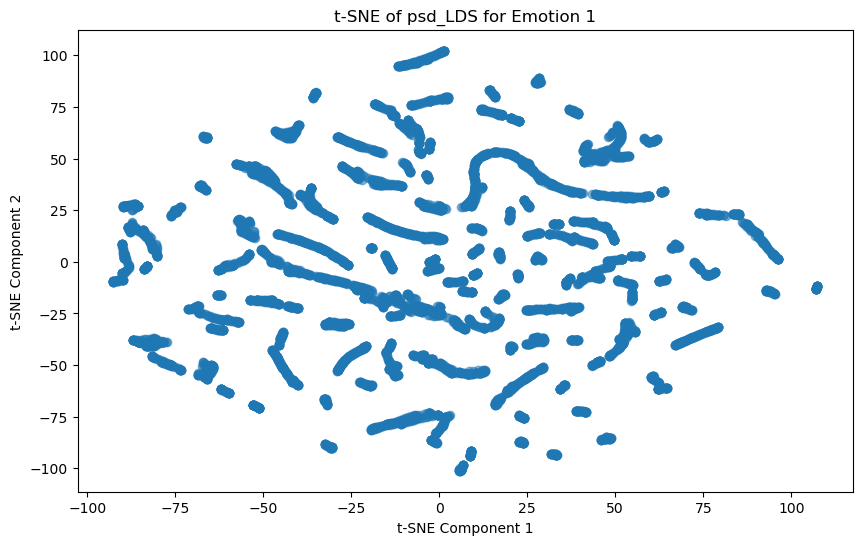

C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


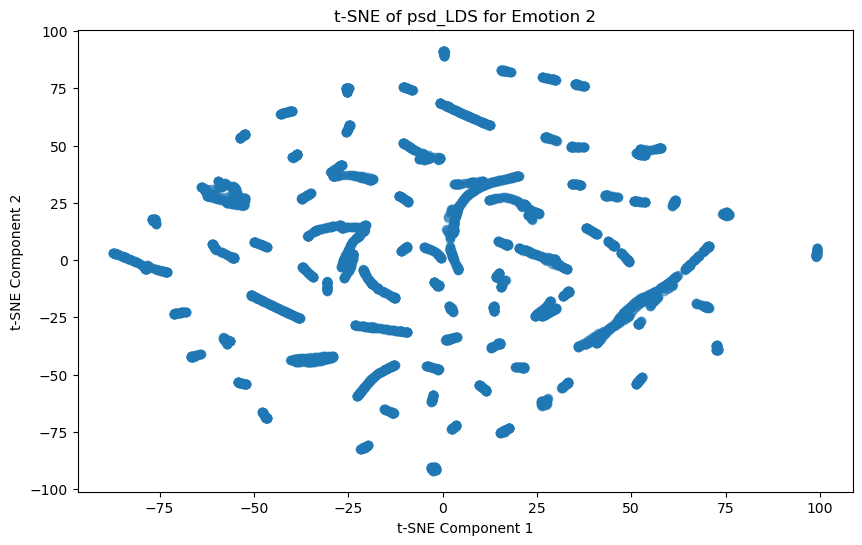

C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


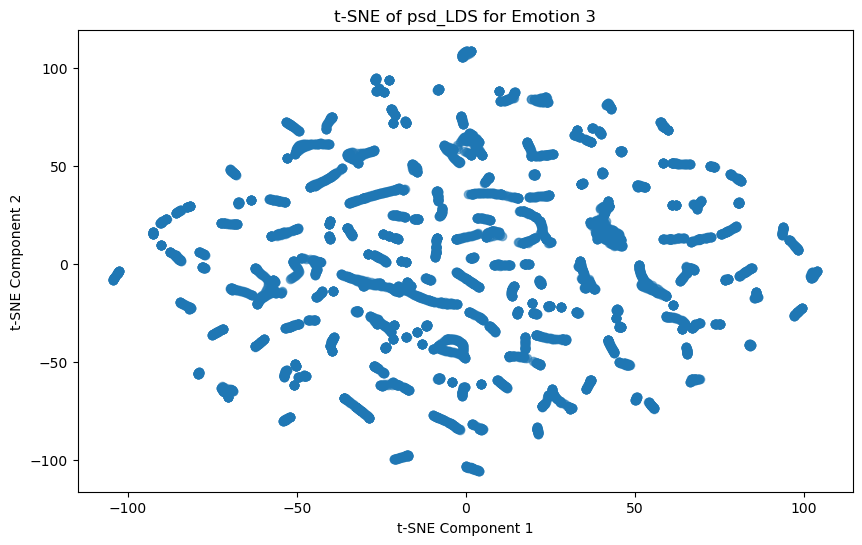

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1.3: Principal Component Analysis (PCA) for Dimensionality Reduction
for label in concatenated_de_lds_by_label:
    data = concatenated_de_lds_by_label[label].reshape(-1, concatenated_de_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.title(f'PCA of de_LDS for Emotion {label}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

for label in concatenated_psd_lds_by_label:
    data = concatenated_psd_lds_by_label[label].reshape(-1, concatenated_psd_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.title(f'PCA of psd_LDS for Emotion {label}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Step 1.4: t-SNE Visualization for Dimensionality Reduction and Clustering
for label in concatenated_de_lds_by_label:
    data = concatenated_de_lds_by_label[label].reshape(-1, concatenated_de_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_result = tsne.fit_transform(data)

    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
    plt.title(f't-SNE of de_LDS for Emotion {label}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

for label in concatenated_psd_lds_by_label:
    data = concatenated_psd_lds_by_label[label].reshape(-1, concatenated_psd_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_result = tsne.fit_transform(data)

    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
    plt.title(f't-SNE of psd_LDS for Emotion {label}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# 0, 1, 2, and 3 denote the ground truth, neutral, sad, fear, and happy emotions

**In summary**:  
The code loads EEG-derived features (DE_LDS and PSD_LDS), groups them by emotion labels, and performs comprehensive exploratory data analysis. It examines variability, computes correlations, and uses PCA and t-SNE to visualize how the EEG features differ or group by emotion. This provides insights into the underlying structure and relationships of EEG signals under different emotional conditions.

1. Variances and Standard Deviation Analysis for Each Emotion

  **Differential Entropy (DE) - LDS Method**:
  - **Variance**:
    - Higher variance was observed for `happy` and `fear`, indicating more distinct EEG signals.
    - `Neutral` had lower variance, suggesting a more stable signal.

  - **Standard Deviation**:
    - `Happy` and `fear` showed greater variability, indicating higher signal complexity.

  **Power Spectral Density (PSD) - LDS Method**:
  - **Variance**:
    - Variance differences between emotions were less pronounced compared to `de_LDS`.
    - `Fear` and `happy` showed slightly higher variance.

  - **Standard Deviation**:
    - `Neutral` had more consistent signals, while `fear` and `sad` showed increased variability, indicating subtle EEG feature changes.

2. Correlation Analysis for Each Emotion

  **DE - LDS Method**:
  - **Correlation Heatmaps**:
    - `Alpha` and `beta` bands were highly correlated for `fear` and `happy`, indicating feature redundancy.

  **PSD - LDS Method**:
  - **Correlation Heatmaps**:
    - `Neutral` and `sad` had higher correlations between `theta` and `alpha`, indicating shared features across these bands.

3. Principal Component Analysis (PCA)

  **DE - LDS Method**:
  - **PCA Insights**:
    - Distinct clusters were observed for `happy` and `fear`.
    - `Sad` and `neutral` showed overlap, indicating similar features.

  **PSD - LDS Method**:
  - **PCA Insights**:
    - Clusters were less distinct compared to `de_LDS`, especially for `neutral` and `sad`.

4. t-SNE Visualization

  **DE - LDS Method**:
  - **t-SNE Clustering**:
    - `Happy` and `fear` showed well-separated clusters, while `neutral` and `sad` overlapped.

  **PSD - LDS Method**:
  - **t-SNE Clustering**:
    - More overlap was observed among `neutral`, `sad`, and `fear` compared to `happy`.

  Overall Observations:
  - **DE vs PSD Features**:
    - `DE` features provided better differentiation, particularly for `happy` and `fear`.
    - `PSD` features showed more correlation, resulting in less distinct clustering.

  - **Emotion Differentiation**:
    - `Happy` and `fear` were easier to distinguish, while `neutral` and `sad` overlapped, making classification challenging.
